In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.shape

(1048575, 21)

In [49]:
df.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                        int64
PATIENT_TYPE               int64
DATE_DIED                 object
INTUBED                  float64
PNEUMONIA                  int64
AGE                        int64
PREGNANT                 float64
DIABETES                   int64
COPD                       int64
ASTHMA                     int64
INMSUPR                    int64
HIPERTENSION               int64
OTHER_DISEASE              int64
CARDIOVASCULAR             int64
OBESITY                    int64
RENAL_CHRONIC              int64
TOBACCO                    int64
CLASIFFICATION_FINAL       int64
ICU                      float64
DECEASED                   int64
Age_Group               category
dtype: object

In [50]:
df["INTUBED"] = df["INTUBED"].replace([97,99], np.nan)
df["INTUBED"].unique()

array([nan,  1.,  2.])

In [16]:
df["PREGNANT"] = df["PREGNANT"].replace([97,98], np.nan)
df["PREGNANT"].unique()

array([ 2., nan,  1.])

In [20]:
df["ICU"] = df["ICU"].replace([97,99], np.nan)
df["ICU"].unique()

array([nan,  2.,  1.])

In [23]:
df["SEX"].dropna()

0          1
1          2
2          2
3          1
4          2
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: SEX, Length: 1048575, dtype: int64

In [ ]:
df["SEX"] = df['SEX'].astype('category')
df['PATIENT_TYPE'].astype('category')
df['CLASIFFICATION_FINAL'].astype('category')
df['PNEUMONIA'].astype('category')
df['DIABETES'].astype('category')

0          2
1          2
2          1
3          2
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: DIABETES, Length: 1048575, dtype: category
Categories (3, int64): [1, 2, 98]

In [54]:
df.dtypes

USMER                      int64
MEDICAL_UNIT               int64
SEX                     category
PATIENT_TYPE               int64
DATE_DIED                 object
INTUBED                  float64
PNEUMONIA                  int64
AGE                        int64
PREGNANT                 float64
DIABETES                   int64
COPD                       int64
ASTHMA                     int64
INMSUPR                    int64
HIPERTENSION               int64
OTHER_DISEASE              int64
CARDIOVASCULAR             int64
OBESITY                    int64
RENAL_CHRONIC              int64
TOBACCO                    int64
CLASIFFICATION_FINAL       int64
ICU                      float64
DECEASED                   int64
Age_Group               category
dtype: object

In [34]:
df['DECEASED'] = (df['DATE_DIED'] != '9999-99-99').astype(int)

In [ ]:
#df["DATE_DIED"].replace("9999-99-99", np.nan, inplace=True)
#df['DECEASED'] = df['DATE_DIED'].apply(lambda x: 0 if pd.isna(x) else 1).astype(int)

In [56]:
kategorien = ['0-19 (Kinder/Jugendliche)','20-39 (Jüngere Erwachsene)','40-59 (Mittlere Erwachsene)','60+ (Ältere Erwachsene)']
max_value = df["AGE"].max()
einteilung = [0,19,39,59,max_value]
df['Age_Group'] = pd.cut(df['AGE'], bins=einteilung, labels=kategorien, right=True)
df["Age_Group"].value_counts()

Age_Group
20-39 (Jüngere Erwachsene)     435925
40-59 (Mittlere Erwachsene)    388041
60+ (Ältere Erwachsene)        156933
0-19 (Kinder/Jugendliche)       63814
Name: count, dtype: int64

In [58]:
mortality_by_group = df.groupby(["SEX", "Age_Group"], 
                                observed=False).agg({"DECEASED":"mean"}).mul(100)
#.mul(100)
mortality_by_group

DECEASED
SEX Age_Group                             
1   0-19 (Kinder/Jugendliche)     0.977230
    20-39 (Jüngere Erwachsene)    0.738030
    40-59 (Mittlere Erwachsene)   4.450094
    60+ (Ältere Erwachsene)      23.238329
2   0-19 (Kinder/Jugendliche)     1.104581
    20-39 (Jüngere Erwachsene)    1.685831
    40-59 (Mittlere Erwachsene)   9.577087
    60+ (Ältere Erwachsene)      31.706457

In [60]:
df.groupby([df["CLASIFFICATION_FINAL"]<=3]).agg({"DIABETES":"count","HIPERTENSION":"count"})
#confirmed = df[df["CLASIFFICATION_FINAL"].astype(int) <=3]
confirmed = df[df["CLASIFFICATION_FINAL"].isin([1.0,2.0,3.0])].copy()
chr = confirmed.groupby(["DIABETES","HIPERTENSION"]).size().reset_index(name="Count")
chr

,DIABETES,HIPERTENSION,Count
0,1,1,33215
1,1,2,28855
2,1,98,44
3,2,1,43445
4,2,2,284853
5,2,98,127
6,98,1,67
7,98,2,156
8,98,98,1217


<Axes: xlabel='AGE', ylabel='Count'>

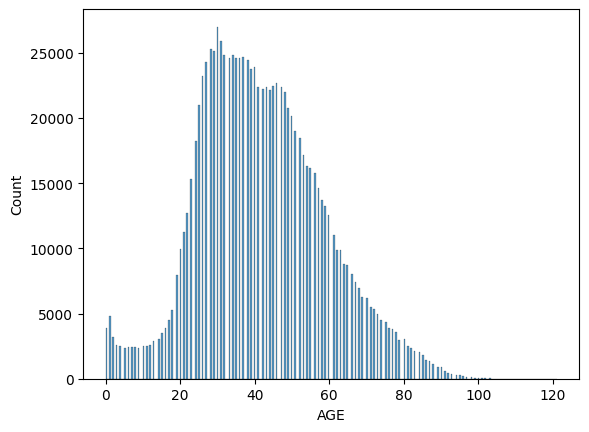

In [42]:
sns.histplot(df, x="AGE")

<Axes: xlabel='DECEASED', ylabel='Age_Group'>

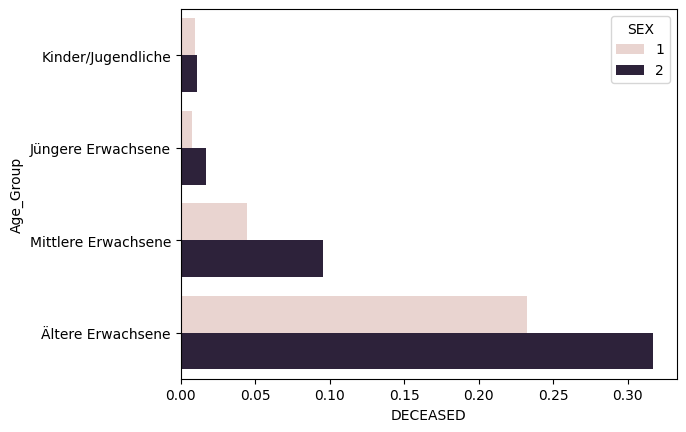

In [47]:
sns.barplot(mortality_by_group, y="Age_Group", x="DECEASED", hue="SEX" )